In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

Vamos a crear una función en 2D que es un mapa topográfico en el cual vamos a aplicar el gradiente descendente para llegar a los mínimos. En un caso práctico, esta sería la función de coste.

$ F(x, y) = sin (\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3)cos(2x + 1 - e^y)$

In [2]:
'''
Es una función anónima, por eso es lambda. th es la entrada a la función y representa a
x e y th[x, y] -> th[0] = x, th[1] = y
'''
func = lambda th: np.sin(1 / 2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3 ) * np.cos(2 * th[0] + 1 - np.e ** th[1]) 
# Ejemplo de ejecución de la función
func([5, 3])

-0.5956138973318122

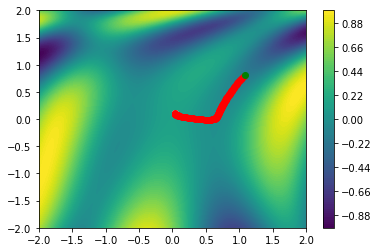

In [3]:
# Vamos a visualizar la función de coste que hemos definido
res = 100
_X = np.linspace(-2, 2, res)
_Y = np.linspace(-2, 2, res)

_Z = np.zeros((res, res))
'''
Enumerate te devuelve el índice del elemento y su valor _Z es una matriz que representa (X,Y,Z). 
Y es la altura, X anchura Z es el valor en la posición del plano X,Y. En el bucle asignamos 
los valores de Y antes que los de X por este motivo, para que quede bien representado.
'''

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y])

# Visualizamos la gráfica
plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()

'''
Vamos a generar un punto aleatorio dentro de la función np.random.rand devuelve un número 
aleatorio [0-1], al hacer * 4 -2 lo dejamos en el rango [-2, 2] que es el mismo que la función 
de ejemplo.
'''

Theta = np.random.rand(2) * 4 -2

'''
Vamos a hacer gradient descent de forma manual. Lo que se hace es modificar de forma mínima (h) 
los valores X e Y una para ver cómo cambia la función y ver si el loss va decreciendo.
'''

_T = np.copy(Theta)
h = 0.001
grad = np.zeros(2)
lr = 0.001
n_iteraciones = 10000

plt.plot(Theta[0], Theta[1], 'o', c = 'white')

for _ in range(n_iteraciones):
    for it, th in enumerate(Theta):
        _T = np.copy(Theta)
        _T[it] = _T[it] + h # Modificación del valor inicial
        # Vemos la diferencia en el loss con la modificación actual. Es un ratio respecto h
        deriv = (func(_T) - func(Theta))/h
        grad[it] = deriv
    Theta = Theta - lr * grad
    if(_ % 100 == 0):
        plt.plot(Theta[0], Theta[1], 'o', c = 'red')

plt.plot(Theta[0], Theta[1], 'o', c = 'green')
plt.show()